In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv'
file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-55-2105697088.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print(df['clickbait_label'].value_counts())
print(df[['clickbait_label', 'clickbait_score']].groupby('clickbait_label'))

clickbait_label
LABEL_0    97607
LABEL_1    11677
Name: count, dtype: int64


In [ ]:
df['clickbait_label'] = df['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})

In [ ]:
print_section_map = {
    'A': 'Main News',
    'B': 'Metro / Local News',
    'BR': 'Book Review',
    'BU': 'Business',
    'C': 'Business / Finance',
    'CT': 'Connecticut',
    'D': 'Sports',
    'E': 'Arts',
    'ED': 'Editorial / Education',
    'F': 'Food / Fashion',
    'L': 'Letters / Literature',
    'LI': 'Long Island',
    'M2': 'Style Magazine',
    'MB': 'Metro Borough',
    'MK': 'Marketplace',
    'MM': 'Metropolitan',
    'NJ': 'New Jersey',
    'P': 'Parenting',
    'P2': 'Parenting 2',
    'PR': 'Press Review',
    'RE': 'Real Estate',
    'S': 'Sports / Magazine',
    'SP': 'Sports',
    'SR': 'Sunday Review',
    'SS': 'Style Section',
    'ST': 'Styles',
    'TJ': 'Travel Journal',
    'TP': 'Technology',
    'TR': 'Travel',
    'TW': 'Week in Review',
    'WE': 'Weekender',
    'AR': 'Arts & Leisure',
    'a': 'Unclear / Parsing Error'
}

# Apply mapping
df['print_section_name'] = df['print_section'].map(print_section_map)


In [ ]:
df['print_section_name'].unique()

array([nan, 'Metro / Local News', 'Business / Finance', 'Travel',
       'Main News', 'Real Estate', 'Sports', 'Metro Borough',
       'Arts & Leisure', 'Styles', 'Book Review', 'Sunday Review',
       'Business', 'Metropolitan', 'Arts', 'Style Magazine',
       'Connecticut', 'Long Island', 'New Jersey', 'Weekender',
       'Food / Fashion', 'Editorial / Education', 'Sports / Magazine',
       'Parenting', 'Letters / Literature', 'Week in Review',
       'Press Review', 'Technology', 'Style Section', 'Travel Journal',
       'Parenting 2', 'Marketplace', 'Unclear / Parsing Error'],
      dtype=object)

In [ ]:
import pandas as pd

# Convert pub_date to datetime
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')

# Create year-month column for grouping
df['year_month'] = df['pub_date'].dt.to_period('M')

# Optional: filter sections with enough data
MIN_HEADLINES = 100
valid_sections = df['section_name'].value_counts()
valid_sections = valid_sections[valid_sections >= MIN_HEADLINES].index
df = df[df['section_name'].isin(valid_sections)]


/tmp/ipython-input-60-453677995.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pub_date'].dt.to_period('M')


In [ ]:
# Group by section and time, then count labels
grouped = df.groupby(['section_name', 'year_month', 'clickbait_label']).size().unstack(fill_value=0)

# Compute total and % clickbait
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100

# Reset index for plotting
grouped = grouped.reset_index()


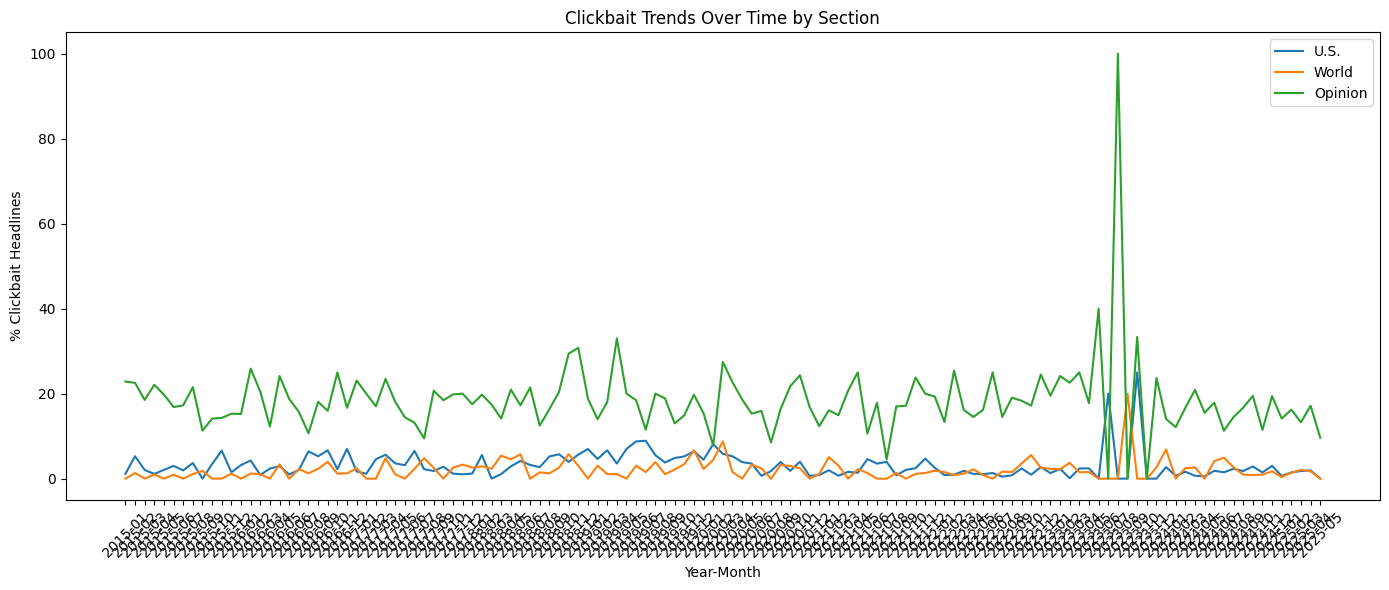

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose top 3 sections to compare
top_sections = df['section_name'].value_counts().nlargest(3).index

plt.figure(figsize=(14, 6))
for section in top_sections:
    data = grouped[grouped['section_name'] == section]
    plt.plot(data['year_month'].astype(str), data['% CLICKBAIT'], label=section)

plt.title('Clickbait Trends Over Time by Section')
plt.xlabel('Year-Month')
plt.ylabel('% Clickbait Headlines')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Convert to datetime if not already done
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')

# Create custom 6-month period column
def to_half_year_period(dt):
    if pd.isnull(dt):
        return pd.NaT
    half = 'H1' if dt.month <= 6 else 'H2'
    return f"{dt.year}-{half}"

df['half_year'] = df['pub_date'].apply(to_half_year_period)


In [ ]:
# Optional: restrict to sections with enough data
MIN_HEADLINES = 100
valid_sections = df['section_name'].value_counts()
valid_sections = valid_sections[valid_sections >= MIN_HEADLINES].index
df = df[df['section_name'].isin(valid_sections)]

# Group by section and half-year
grouped = df.groupby(['section_name', 'half_year', 'clickbait_label']).size().unstack(fill_value=0)
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100
grouped = grouped.reset_index()


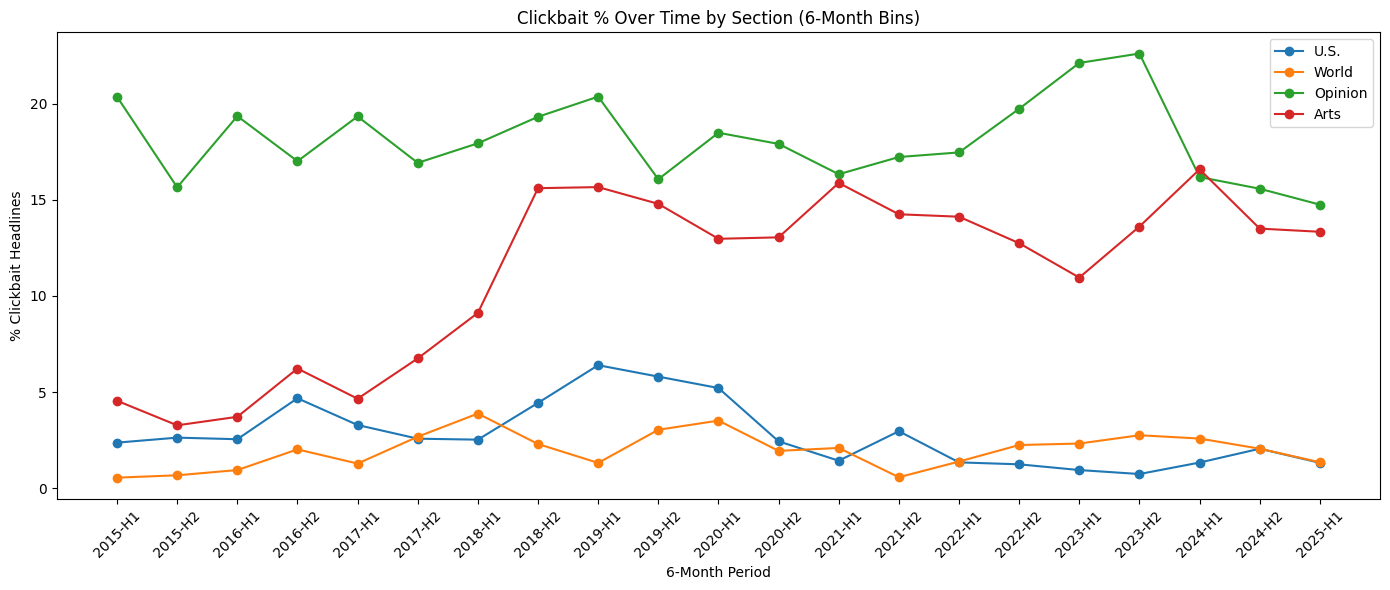

In [ ]:
import matplotlib.pyplot as plt

# Pick top sections to plot
top_sections = df['section_name'].value_counts().nlargest(4).index

plt.figure(figsize=(14, 6))
for section in top_sections:
    data = grouped[grouped['section_name'] == section]
    plt.plot(data['half_year'], data['% CLICKBAIT'], marker='o', label=section)

plt.title('Clickbait % Over Time by Section (6-Month Bins)')
plt.xlabel('6-Month Period')
plt.ylabel('% Clickbait Headlines')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df['print_section'].unique()

array([nan, 'B', 'C', 'TR', 'A', 'RE', 'D', 'SP', 'MB', 'AR', 'ST', 'BR',
       'SR', 'BU', 'MM', 'E', 'M2', 'CT', 'LI', 'NJ', 'WE', 'F', 'ED',
       'S', 'P', 'L', 'TW', 'PR', 'TP', 'SS', 'TJ', 'P2', 'MK', 'a'],
      dtype=object)

## for print section (main sections of nyt)

In [ ]:
# Convert pub_date to datetime (if needed)
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')

# Create 6-month bins: H1 = Jan–Jun, H2 = Jul–Dec
def to_half_year_period(dt):
    if pd.isnull(dt):
        return pd.NaT
    half = 'H1' if dt.month <= 6 else 'H2'
    return f"{dt.year}-{half}"

df['half_year'] = df['pub_date'].apply(to_half_year_period)


In [ ]:
# Filter print_sections with enough articles
MIN_HEADLINES = 100
valid_print_sections = df['print_section'].value_counts()
valid_print_sections = valid_print_sections[valid_print_sections >= MIN_HEADLINES].index
df_filtered = df[df['print_section'].isin(valid_print_sections)]


In [ ]:
grouped = df_filtered.groupby(['print_section', 'half_year', 'clickbait_label']).size().unstack(fill_value=0)
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100
grouped = grouped.reset_index()


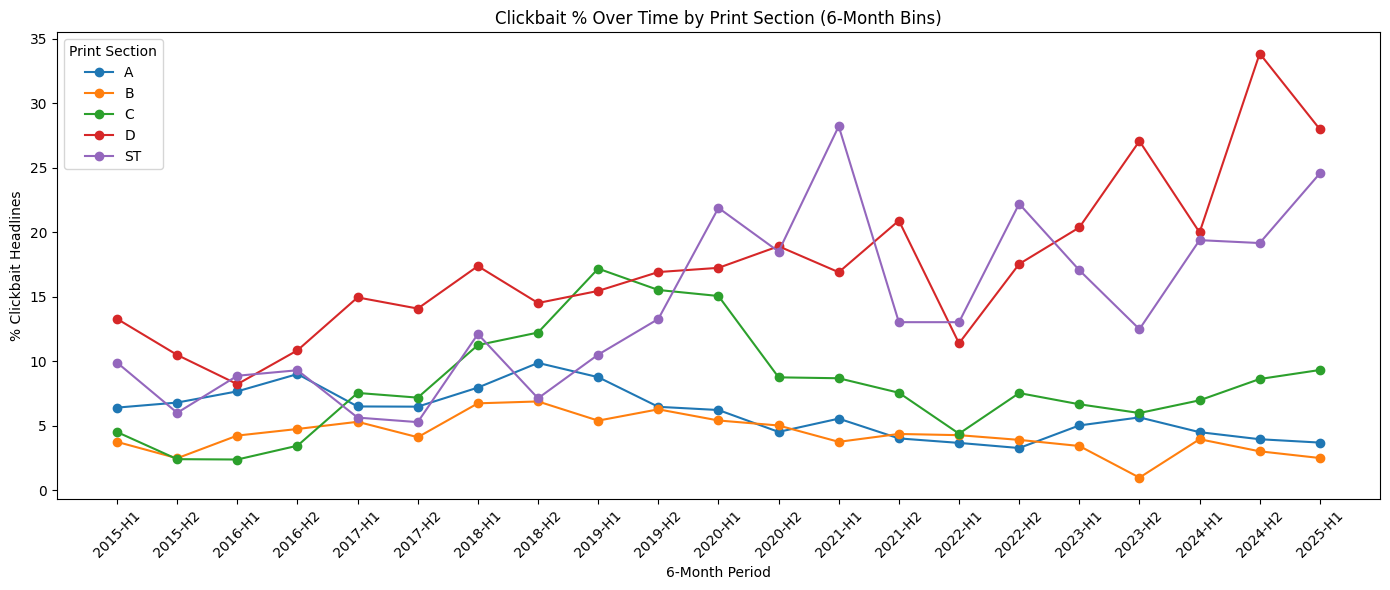

In [ ]:
import matplotlib.pyplot as plt

# Top 5 print sections by volume
top_print_sections = df_filtered['print_section'].value_counts().nlargest(5).index

plt.figure(figsize=(14, 6))
for section in top_print_sections:
    data = grouped[grouped['print_section'] == section]
    plt.plot(data['half_year'], data['% CLICKBAIT'], marker='o', label=section)

plt.title('Clickbait % Over Time by Print Section (6-Month Bins)')
plt.xlabel('6-Month Period')
plt.ylabel('% Clickbait Headlines')
plt.xticks(rotation=45)
plt.legend(title='Print Section')
plt.tight_layout()
plt.show()


In [ ]:
print_section_map = {
    'A': 'Main News',
    'B': 'Metro / Local News',
    'BR': 'Book Review',
    'BU': 'Business',
    'C': 'Business / Finance',
    'CT': 'Connecticut',
    'D': 'Sports',
    'E': 'Arts',
    'ED': 'Editorial / Education',
    'F': 'Food / Fashion',
    'L': 'Letters / Literature',
    'LI': 'Long Island',
    'M2': 'Style Magazine',
    'MB': 'Metro Borough',
    'MK': 'Marketplace',
    'MM': 'Metropolitan',
    'NJ': 'New Jersey',
    'P': 'Parenting',
    'P2': 'Parenting 2',
    'PR': 'Press Review',
    'RE': 'Real Estate',
    'S': 'Sports / Magazine',
    'SP': 'Sports',
    'SR': 'Sunday Review',
    'SS': 'Style Section',
    'ST': 'Styles',
    'TJ': 'Travel Journal',
    'TP': 'Technology',
    'TR': 'Travel',
    'TW': 'Week in Review',
    'WE': 'Weekender',
    'AR': 'Arts & Leisure',
    'a': 'Unclear / Parsing Error'
}

# Apply mapping
df['print_section_name'] = df['print_section'].map(print_section_map)


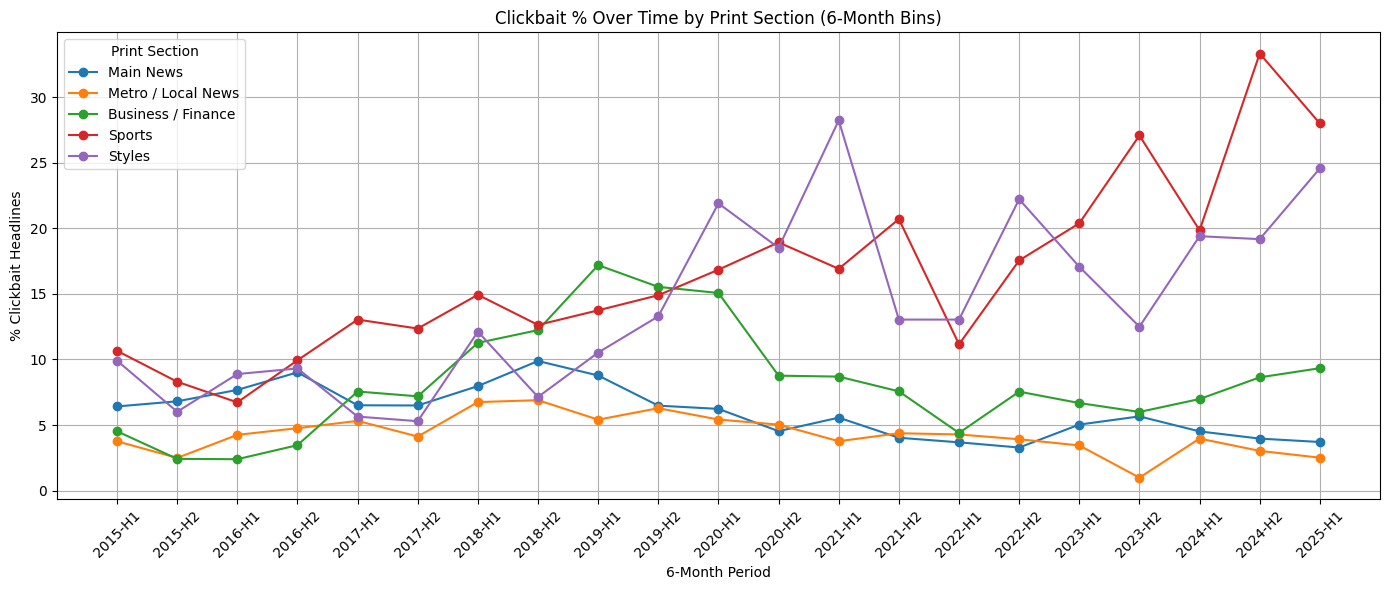

In [ ]:
# Convert pub_date and filter rows with valid print_section_name
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df = df[df['print_section_name'].notnull() & df['clickbait_label'].notnull()]

# Create 6-month interval column
def to_half_year_period(dt):
    if pd.isnull(dt): return pd.NaT
    half = 'H1' if dt.month <= 6 else 'H2'
    return f"{dt.year}-{half}"

df['half_year'] = df['pub_date'].apply(to_half_year_period)

# Group by print_section_name and 6-month interval
grouped = df.groupby(['print_section_name', 'half_year', 'clickbait_label']).size().unstack(fill_value=0)
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100
grouped = grouped.reset_index()

# Plot for top N print sections by total volume
top_sections = df['print_section_name'].value_counts().nlargest(5).index

plt.figure(figsize=(14, 6))
for section in top_sections:
    data = grouped[grouped['print_section_name'] == section]
    plt.plot(data['half_year'], data['% CLICKBAIT'], marker='o', label=section)

plt.title('Clickbait % Over Time by Print Section (6-Month Bins)')
plt.xlabel('6-Month Period')
plt.ylabel('% Clickbait Headlines')
plt.xticks(rotation=45)
plt.legend(title='Print Section')
plt.tight_layout()
plt.grid(True)
plt.show()


## 22 June


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv'
file_path1 = '/content/drive/MyDrive/nyt_articles/streamie_headline_test.csv'
file_path2 = '/content/drive/MyDrive/nyt_articles/streamie_lead_test.csv'


In [10]:
df_headlineonly = pd.read_csv(file_path1)
df_headlinelead = pd.read_csv(file_path2)

/tmp/ipython-input-10-3596964995.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_headlineonly = pd.read_csv(file_path1)
/tmp/ipython-input-10-3596964995.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_headlinelead = pd.read_csv(file_path2)


In [11]:
df_headlineonly['clickbait_label'] = df_headlineonly['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})

In [12]:
df_headlinelead['clickbait_label'] = df_headlinelead['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})

In [13]:
print_section_map = {
    'A': 'Main News',
    'B': 'Metro / Local News',
    'BR': 'Book Review',
    'BU': 'Business',
    'C': 'Business / Finance',
    'CT': 'Connecticut',
    'D': 'Sports',
    'E': 'Arts',
    'ED': 'Editorial / Education',
    'F': 'Food / Fashion',
    'L': 'Letters / Literature',
    'LI': 'Long Island',
    'M2': 'Style Magazine',
    'MB': 'Metro Borough',
    'MK': 'Marketplace',
    'MM': 'Metropolitan',
    'NJ': 'New Jersey',
    'P': 'Parenting',
    'P2': 'Parenting 2',
    'PR': 'Press Review',
    'RE': 'Real Estate',
    'S': 'Sports / Magazine',
    'SP': 'Sports',
    'SR': 'Sunday Review',
    'SS': 'Style Section',
    'ST': 'Styles',
    'TJ': 'Travel Journal',
    'TP': 'Technology',
    'TR': 'Travel',
    'TW': 'Week in Review',
    'WE': 'Weekender',
    'AR': 'Arts & Leisure',
    'a': 'Unclear / Parsing Error'
}

# Apply mapping
df_headlineonly['print_section_name'] = df_headlineonly['print_section'].map(print_section_map)


In [14]:
df_headlinelead['print_section_name'] = df_headlinelead['print_section'].map(print_section_map)


/tmp/ipython-input-15-226930175.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_headlineonly['half_year'] = df_headlineonly['pub_date'].apply(to_half_year_period)


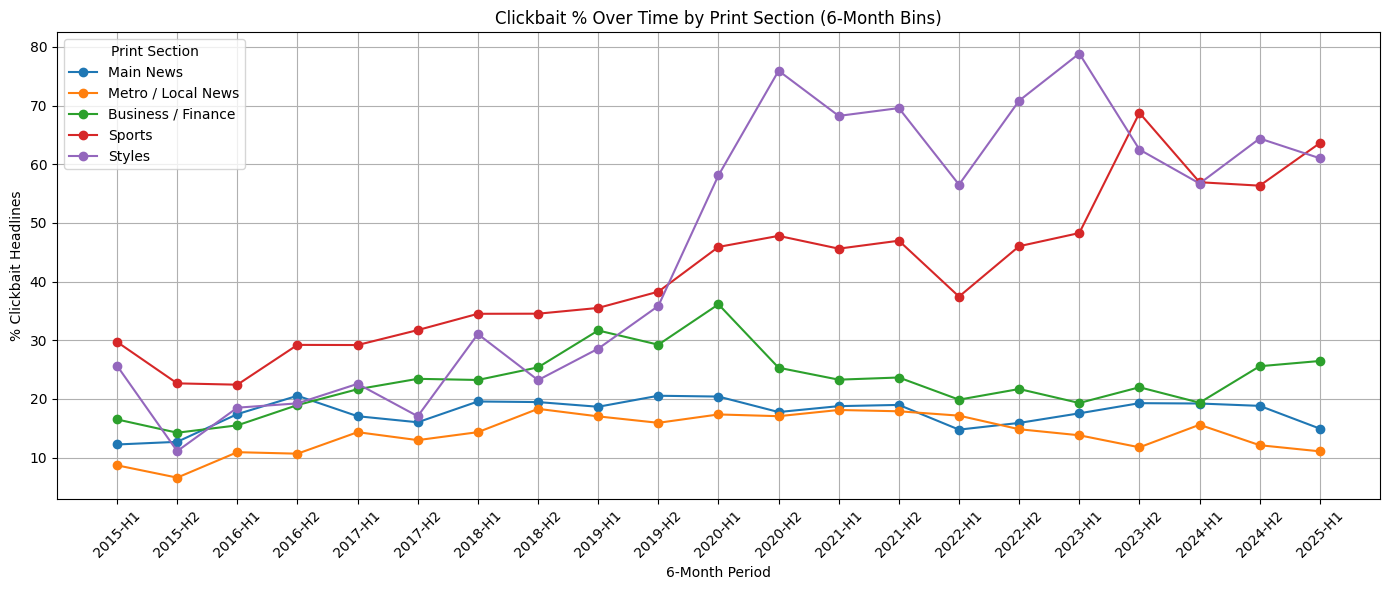

In [15]:
# Convert pub_date and filter rows with valid print_section_name
df_headlineonly['pub_date'] = pd.to_datetime(df_headlineonly['pub_date'], errors='coerce')
df_headlineonly = df_headlineonly[df_headlineonly['print_section_name'].notnull() & df_headlineonly['clickbait_label'].notnull()]

# Create 6-month interval column
def to_half_year_period(dt):
    if pd.isnull(dt): return pd.NaT
    half = 'H1' if dt.month <= 6 else 'H2'
    return f"{dt.year}-{half}"

df_headlineonly['half_year'] = df_headlineonly['pub_date'].apply(to_half_year_period)

# Group by print_section_name and 6-month interval
grouped = df_headlineonly.groupby(['print_section_name', 'half_year', 'clickbait_label']).size().unstack(fill_value=0)
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100
grouped = grouped.reset_index()

# Plot for top N print sections by total volume
top_sections = df_headlineonly['print_section_name'].value_counts().nlargest(5).index

plt.figure(figsize=(14, 6))
for section in top_sections:
    data = grouped[grouped['print_section_name'] == section]
    plt.plot(data['half_year'], data['% CLICKBAIT'], marker='o', label=section)

plt.title('Clickbait % Over Time by Print Section (6-Month Bins)')
plt.xlabel('6-Month Period')
plt.ylabel('% Clickbait Headlines')
plt.xticks(rotation=45)
plt.legend(title='Print Section')
plt.tight_layout()
plt.grid(True)
plt.show()


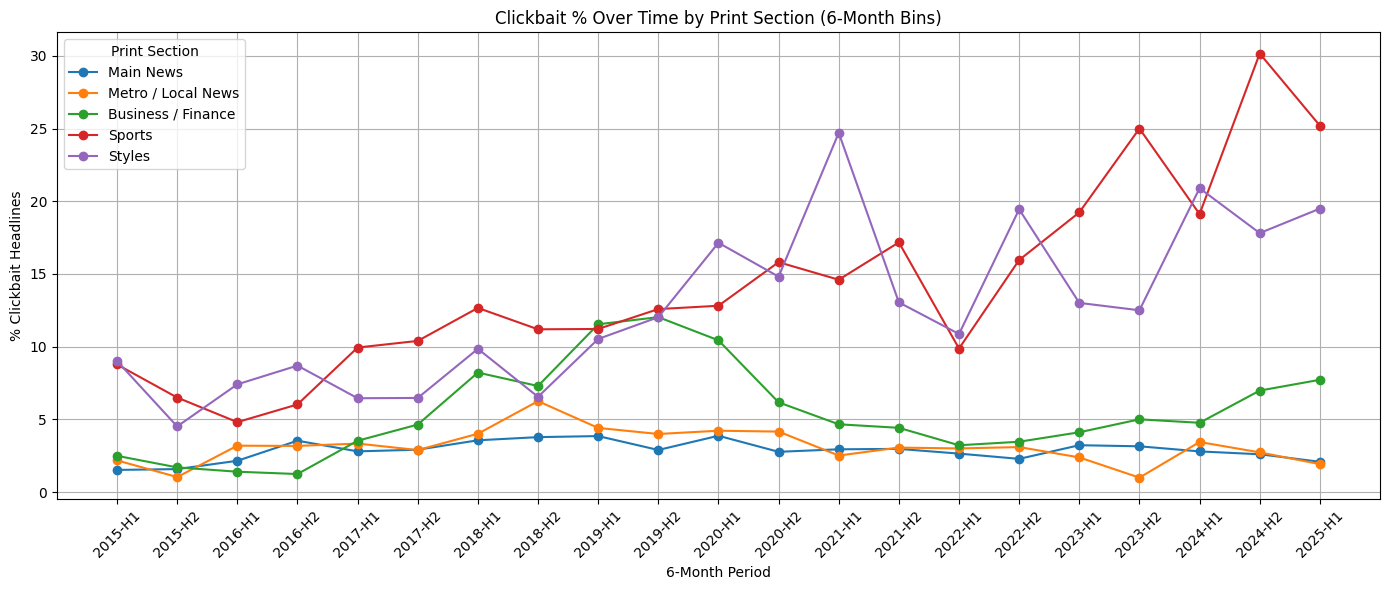

In [18]:
# Convert pub_date and filter rows with valid print_section_name
df_headlinelead['pub_date'] = pd.to_datetime(df_headlinelead['pub_date'], errors='coerce')
df_headlinelead = df_headlinelead[df_headlinelead['print_section_name'].notnull() & df_headlinelead['clickbait_label'].notnull()]

# Create 6-month interval column
def to_half_year_period(dt):
    if pd.isnull(dt): return pd.NaT
    half = 'H1' if dt.month <= 6 else 'H2'
    return f"{dt.year}-{half}"

df_headlinelead['half_year'] = df_headlinelead['pub_date'].apply(to_half_year_period)

# Group by print_section_name and 6-month interval
grouped = df_headlinelead.groupby(['print_section_name', 'half_year', 'clickbait_label']).size().unstack(fill_value=0)
grouped['Total'] = grouped['CLICKBAIT'] + grouped['NOT']
grouped['% CLICKBAIT'] = (grouped['CLICKBAIT'] / grouped['Total']) * 100
grouped = grouped.reset_index()

# Plot for top N print sections by total volume
top_sections = df_headlinelead['print_section_name'].value_counts().nlargest(5).index

plt.figure(figsize=(14, 6))
for section in top_sections:
    data = grouped[grouped['print_section_name'] == section]
    plt.plot(data['half_year'], data['% CLICKBAIT'], marker='o', label=section)

plt.title('Clickbait % Over Time by Print Section (6-Month Bins)')
plt.xlabel('6-Month Period')
plt.ylabel('% Clickbait Headlines')
plt.xticks(rotation=45)
plt.legend(title='Print Section')
plt.tight_layout()
plt.grid(True)
plt.show()
